# Fake-news-detector 
This project aims to use traditional ML techniques to classify news articles as **real** or **fake**. We would use a labeled kaggle dataset and basic and elementary models like logical regression and Random forest.

👨‍💻 Tech- Stack:
- Python
- Scikit-learn
- Pandas
- TF-IDF for vectorisation

# Load all the dependencies 

In [1]:

import pandas as pd

# Data splitting and transformation
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

import seaborn as sns
import matplotlib.pyplot as plt


In [1]:
import torch 
print(torch.cuda.is_available())


True


# 1. loading the dataset 

In [2]:
#load datasets
true_df=pd.read_csv("../datasets/True.csv")
fake_df=pd.read_csv("../datasets/Fake.csv")

#Add labels 
true_df["label"]=1
fake_df["label"]=0

# Combine the datasets
df = pd.concat([true_df, fake_df], ignore_index=True)
df['text'] =df['title']+"."+df["text"]
df=df[['text','label']]
# Shuffling the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Preview
df.head()


,text,label
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,0
1,Failed GOP Candidates Remembered In Hilarious...,0
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,0
3,California AG pledges to defend birth control ...,1
4,AZ RANCHERS Living On US-Mexico Border Destroy...,0


# 2. Basic Exploratory Data Analysis
We'll:

- Check dataset shape and balance

- Visualize real vs fake distribution

- Look at example headlines/content



Dataset shape: (44898, 2)

Missing values:
 text     0
label    0
dtype: int64


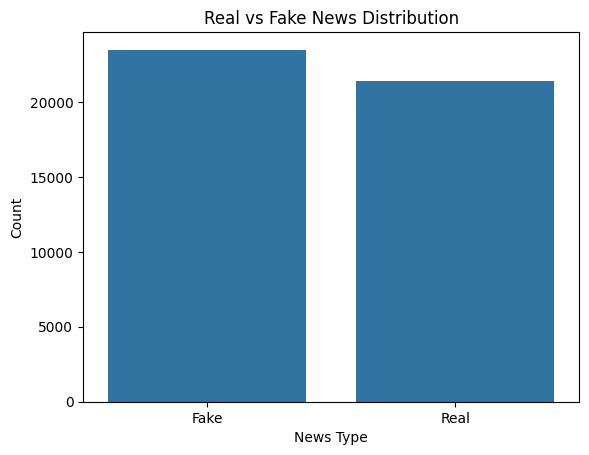


Example Fake News:
  BREAKING: GOP Chairman Grassley Has Had Enough, DEMANDS Trump Jr. Testimony.Donald Trump s White House is in chaos, and they are trying to cover it up. Their Russia problems are mounting by the hour, and they refuse to acknowledge that there are problems surrounding all of this. To them, it s  fake news,  or a  hoax.  However, the facts bear things out differently, and it seems that there are now cracks in the Congressional public leadership.Chuck Grassley (R-Iowa), who heads the Senate Judiciary Committee, is fed up. He is now demanding that Donald Trump, Jr. and former 2016 Trump Campaign Manager Paul Manafort testify before his committee regarding the now infamous shady meeting between Donald Trump and the shady Russian lawyer who promised dirt on 2016 Democratic Presidential nominee Hillary Clinton. In fact, this information is due, well, NOW. This demand sends a few signals to team Trump   most notably that they should not fire Special Counsel Robert Mueller 

In [5]:
# Checking overall shape and missing values
print("Dataset shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())

# Class distribution
sns.countplot(x='label', data=df)
plt.title("Real vs Fake News Distribution")
plt.xticks([0, 1], ['Fake', 'Real'])
plt.xlabel("News Type")
plt.ylabel("Count")
plt.show()

print("\nExample Fake News:\n", df[df.label == 0]["text"].iloc[0])
print("\nExample Real News:\n", df[df.label == 1]["text"].iloc[0])


In [7]:
df.columns
df.sample(5)

,text,label
5911,90% Of Hollywood Political Contributions Have ...,0
3425,Another Fox Host Just Got Busted Sexually Har...,0
41485,Racist Sign Calls For Lynching Black People T...,0
25818,"Clinton, other former top diplomats mark new d...",1
34958,Exclusive: $6 for 38 days work: Child exploita...,1


# Tokeniz analysis

In [9]:
#tokeinzetion for furture extaction
import nltk
d2 = df#.copy()

# Download tokenizer data
nltk.download('punkt_tab')

# Tokenize             
d2['token'] = ''
d2['token'] = d2['text'].apply(nltk.word_tokenize)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


In [10]:
d2.shape


(44898, 3)

In [17]:
from collections import Counter
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk import bigrams
from textblob import TextBlob


all_words = [word.lower() for tokens in d2['token'] for word in tokens]
word_freq = Counter(all_words)

# Get top 5 most common words
top_words = word_freq.most_common(5)
print("Top 5 Words:", top_words)


Top 5 Words: [('the', 1015557), (',', 899738), ('.', 614727), ('to', 552040), ('of', 448880)]


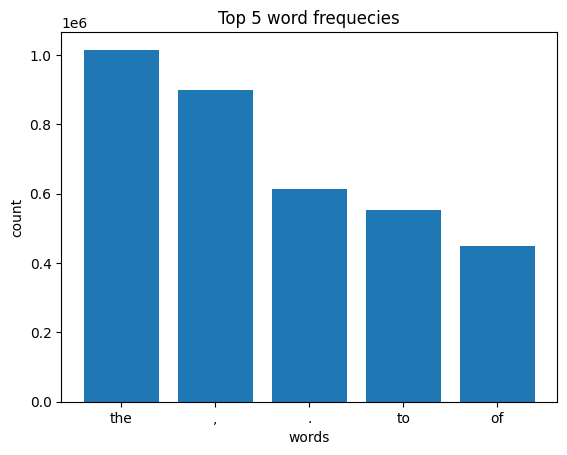

In [19]:
words,count =zip(*top_words)
plt.bar(words,count)
plt.title("Top 5 word frequecies")
plt.xlabel("words")
plt.ylabel("count")
plt.show()

In [16]:
# Alternative with CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(lowercase=True)
X = vectorizer.fit_transform(df['text'])
word_counts = dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).A1))
print("Vectorized Counts:", word_counts)


Vectorized Counts: {'00': 676, '000': 11734, '0000': 17, '00000017': 1, '00004': 2, '000048': 1, '000063': 1, '00007': 1, '000270': 1, '00042': 1, '0005': 1, '0009': 3, '000938': 1, '000a': 10, '000after': 2, '000although': 4, '000american': 1, '000california': 2, '000cases': 1, '000cylvia': 2, '000dillon000': 1, '000ecuador': 1, '000florida': 2, '000georgia': 2, '000have': 1, '000illegal': 2, '000illinois': 2, '000in': 8, '000jose': 2, '000kyrgyzstan': 1, '000m': 2, '000michigan': 2, '000new': 4, '000oman': 1, '000s': 3, '000saudi': 1, '000south': 2, '000th': 6, '000that': 1, '000the': 2, '000uterine': 1, '001': 22, '00106': 2, '0011': 1, '00155': 3, '0018': 2, '0019': 1, '00193': 1, '001romney': 2, '001st': 1, '002': 6, '0020': 2, '00220': 1, '00240': 1, '002singapore': 1, '003': 9, '0036': 1, '004': 4, '0040': 1, '0041': 1, '0045': 2, '00458': 1, '0047': 1, '004saint': 1, '005': 8, '0050': 2, '005380': 6, '005930': 2, '006': 5, '00654': 2, '00684': 5, '007': 6, '0075': 1, '0076': 1,

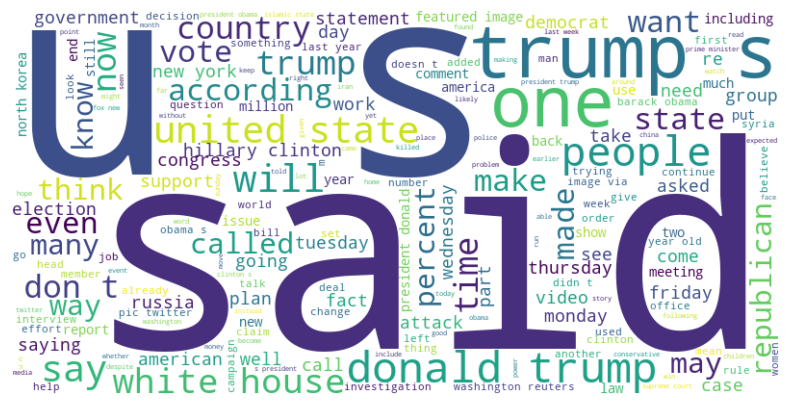

In [20]:
# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [21]:
#removing stopwords
from nltk.corpus import stopwords
# Download stopwords (run once)
nltk.download('stopwords')

# Load English stopwords
stop_words = set(stopwords.words('english'))

#Remove stopwords from tokens
d2['tokens_no_stop'] = d2['token'].apply(lambda x: [word for word in x if word.lower() not in stop_words])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [22]:
d2.shape

(44898, 4)

In [25]:
all_words = [word.lower() for tokens in d2['tokens_no_stop'] for word in tokens]
word_freq = Counter(all_words)

# Get top 5 most common words
top_words = word_freq.most_common(5)
print("Top 5 Words:", top_words)

Top 5 Words: [(',', 899738), ('.', 614727), ('trump', 141817), ('said', 130388), ('’', 84299)]


In [31]:

#lets remove puntuation marks also
import string
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)  # Includes '.', ',', "'", etc.
punctuation.add('’')  # Add '’' to the set of punctuation
punctuation.add('“')  # Add '“' to the set of punctuation
punctuation.add('”')  # Add '”' to the set of punctuation
d2['tokens_no_stop'] = d2['token'].apply(
    lambda x: [word for word in x if word.lower() not in stop_words and word not in punctuation]
)
#let now see top 10 words
all_words=[word.lower() for token in d2['tokens_no_stop'] for word in token]
word_freq=Counter(all_words)

top_w=word_freq.most_common(10)
print("Print 10 words:",top_w)

Print 10 words: [('trump', 141817), ('said', 130388), ('would', 55475), ('president', 53318), ('u.s.', 48968), ('people', 41695), ('one', 36186), ('state', 33247), ('new', 31864), ('also', 31226)]


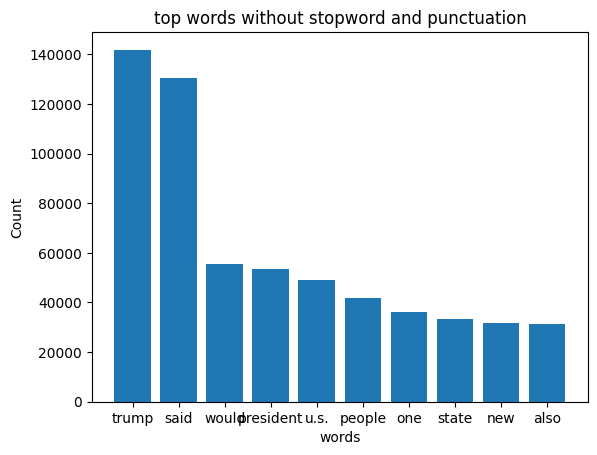

In [30]:
word,count=zip(*top_w)
plt.bar(word,count)
plt.title("top words without stopword and punctuation")
plt.xlabel("words")
plt.ylabel("Count")
plt.show()


In [32]:
#Goal: Extract and count bi-grams for contextual patterns.
all_bigrams = [bigram for tokens in d2['tokens_no_stop'] for bigram in bigrams(tokens)]
bigram_freq = Counter(all_bigrams)
bigram_freq = bigram_freq.most_common(20)

print("Top 5 Bi-grams without stop words")

sorted_bigrams = sorted(bigram_freq, key=lambda item: item[1], reverse=True)

# prints=0
for key, value in sorted_bigrams:
    print(f"Key: {key} , Count: {value}")

Top 5 Bi-grams without stop words
Key: ('Donald', 'Trump') , Count: 22793
Key: ('United', 'States') , Count: 18298
Key: ('White', 'House') , Count: 15406
Key: ('Hillary', 'Clinton') , Count: 9422
Key: ('New', 'York') , Count: 8039
Key: ('North', 'Korea') , Count: 7098
Key: ('President', 'Donald') , Count: 6798
Key: ('image', 'via') , Count: 6067
Key: ('Barack', 'Obama') , Count: 5584
Key: ('Trump', 'said') , Count: 4799
Key: ('Supreme', 'Court') , Count: 4504
Key: ('said', 'statement') , Count: 4426
Key: ('President', 'Trump') , Count: 4289
Key: ('last', 'year') , Count: 4275
Key: ('President', 'Obama') , Count: 4055
Key: ('Islamic', 'State') , Count: 4005
Key: ('last', 'week') , Count: 3981
Key: ('said', 'would') , Count: 3741
Key: ('President', 'Barack') , Count: 3717
Key: ('Trump', 'administration') , Count: 3580


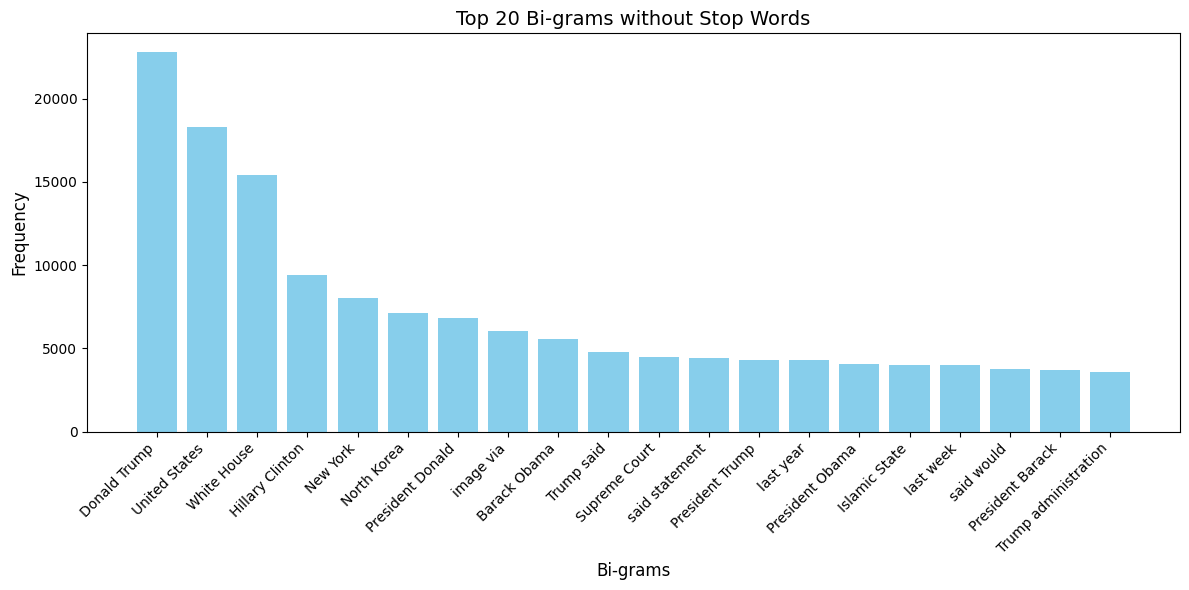

In [37]:
# Visualization: Bar chart of top bi-grams
bigrams, counts = zip(*sorted_bigrams)  # Unpack into separate lists
bigrams = [' '.join(bigram) for bigram in bigrams]  # Convert tuples to strings

plt.figure(figsize=(12, 6))  # Set figure size
plt.bar(bigrams, counts, color='skyblue')  # Create bar chart
plt.xlabel('Bi-grams', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top 20 Bi-grams without Stop Words', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate labels for readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

# Sentiment analysis

In [39]:
# Using TextBlob
d2['sentiment'] = d2['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
print("Sentiment Scores:\n", d2[['text', 'sentiment'].sample(5)])

AttributeError: 'list' object has no attribute 'sample'

# 3.Preprocessing and Test-train split
- Drop nulls
- Encode target labels
- split into test/train


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

df.dropna(subset=['text','label'],inplace=True)
X = df['text']
y=df['label']
print(df['label'].unique())
print(y.isnull().sum())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


[0 1]
0


# 4. TF-IDF Vectoristation


In [7]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


# 5. Train and Evaluate ML Models


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)
y_pred_lr = lr.predict(X_test_tfidf)
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_tfidf, y_train)
y_pred_rf = rf.predict(X_test_tfidf)
print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))



Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4669
           1       0.98      0.99      0.99      4311

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Random Forest Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4669
           1       0.99      0.99      0.99      4311

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



# 6. Lets predict and check confidence 

In [47]:
news_text = input("Enter the news or headline: ")

text_tfidf = vectorizer.transform([news_text])  

# Logistic Regression prediction and confidence
lr_pred = lr.predict(text_tfidf)[0]
lr_conf = lr.predict_proba(text_tfidf)[0][lr_pred]

# Random Forest prediction and confidence
rf_pred = rf.predict(text_tfidf)[0]
rf_conf = rf.predict_proba(text_tfidf)[0][rf_pred]

print(f"\nLogistic Regression says: {'Fake' if lr_pred == 0 else 'Real'} news with confidence {lr_conf:.2f}")
print(f"Random Forest says: {'Fake' if rf_pred == 0 else 'Real'} news with confidence {rf_conf:.2f}")


Enter the news or headline:  The government has announced a secret plan to replace all currency with digital implants starting next month.



Logistic Regression says: Fake news with confidence 0.56
Random Forest says: Fake news with confidence 0.64


In [68]:
news_text = input("Enter the news or headline: ")


text_tfidf = vectorizer.transform([news_text])  

# Logistic Regression prediction and confidence
lr_pred = lr.predict(text_tfidf)[0]
lr_conf = lr.predict_proba(text_tfidf)[0][lr_pred]

# Random Forest prediction and confidence
rf_pred = rf.predict(text_tfidf)[0]
rf_conf = rf.predict_proba(text_tfidf)[0][rf_pred]


print(f"\nLogistic Regression says: {'Fake' if lr_pred == 0 else 'Real'} news with confidence {lr_conf:.2f}")
print(f"Random Forest says: {'Fake' if rf_pred == 0 else 'Real'} news with confidence {rf_conf:.2f}")


Enter the news or headline:   Colombia Strikes a Peace Deal. If at first you don’t succeed, find another way to get the job done. Colombian President Juan Santos took this advice to heart. He first won election back in 2010 while promising to continue Colombia’s fifty-year-old fight against the Marxist guerilla group FARC. Once in office he changed his mind. Years of peace talks finally culminated with the announcement on August 25, 2016: the two sides had agreed on six negotiating points and a national referendum would be held to approve the deal. Santos’s predecessor, Álvaro Uribe, led critics who assailed the deal for its leniency toward the FARC. Polls predicted that the “yes” vote would carry easily. But Colombians voted down the deal. Santos, who was awarded the 2016 Nobel Peace Prize for negotiating the agreement, proceeded to hammer out a new deal. Unveiled on November 24, 2016, it toughened some of the provisions on FARC members. But the biggest change was dropping the require


Logistic Regression says: Real news with confidence 0.78
Random Forest says: Real news with confidence 0.60


In [50]:
news_text = input("Enter the news or headline: ")


text_tfidf = vectorizer.transform([news_text])  

# Logistic Regression prediction and confidence
lr_pred = lr.predict(text_tfidf)[0]
lr_conf = lr.predict_proba(text_tfidf)[0][lr_pred]

# Random Forest prediction and confidence
rf_pred = rf.predict(text_tfidf)[0]
rf_conf = rf.predict_proba(text_tfidf)[0][rf_pred]


print(f"\nLogistic Regression says: {'Fake' if lr_pred == 0 else 'Real'} news with confidence {lr_conf:.2f}")
print(f"Random Forest says: {'Fake' if rf_pred == 0 else 'Real'} news with confidence {rf_conf:.2f}")


Enter the news or headline:  The U.S.-China Trade War Continues.



Logistic Regression says: Real news with confidence 0.63
Random Forest says: Fake news with confidence 0.69


In [51]:
news_text = input("Enter the news or headline: ")


text_tfidf = vectorizer.transform([news_text])  

# Logistic Regression prediction and confidence
lr_pred = lr.predict(text_tfidf)[0]
lr_conf = lr.predict_proba(text_tfidf)[0][lr_pred]

# Random Forest prediction and confidence
rf_pred = rf.predict(text_tfidf)[0]
rf_conf = rf.predict_proba(text_tfidf)[0][rf_pred]


print(f"\nLogistic Regression says: {'Fake' if lr_pred == 0 else 'Real'} news with confidence {lr_conf:.2f}")
print(f"Random Forest says: {'Fake' if rf_pred == 0 else 'Real'} news with confidence {rf_conf:.2f}")


Enter the news or headline:  The U.S.-China Trade War Continues. Back in March 2018, President Donald Trump tweeted that “trade wars are good and easy to win.” That hasn’t been the case so far with his trade war with China. In February, Trump delayed imposing a new round of tariffs on Chinese goods in a bid to give negotiators time to strike a deal. In May, he concluded that the talks hadn’t progressed and imposed a new round of tariffs. In June, Trump and Chinese President Xi Jinping agreed at the G-20 summit to push ahead with trade talks. In August, however, Trump announced he would place tariffs on $300 billion worth of Chinese goods effective September 1. Twelve days later, he partially reversed course, saying he would delay half those tariffs until December 15. China wasn’t mollified; on August 23 it announced tariffs on $75 billion worth of U.S. goods. Negotiators continued to meet, and on October 11 they reached tentative agreement on a “Phase 1” deal. It took another two month


Logistic Regression says: Real news with confidence 0.77
Random Forest says: Real news with confidence 0.61


# lets test our model with real world data using newsAPI

In [71]:
from newsapi import NewsApiClient

# Initialize News API
newsapi = NewsApiClient(api_key="74500dffffdd479287e00d1531422cad")
resp = newsapi.get_everything(q="india", language="en", page_size=5, sort_by="relevancy")

texts, sources = [], []
lr_preds, lr_probs = [], []
rf_preds, rf_probs = [], []

for art in resp['articles']:
    title = art.get('title', '')
    desc = art.get('description') or ''
    full_text = f"{title}. {desc}"
    texts.append(full_text)
    sources.append(art.get('source', {}).get('name'))

    # TF-IDF vectorization
    text_tfidf = vectorizer.transform([full_text])

    # Logistic Regression prediction and confidence
    lr_pred = lr.predict(text_tfidf)[0]
    lr_conf = lr.predict_proba(text_tfidf)[0]

    # Random Forest prediction and confidence
    rf_pred = rf.predict(text_tfidf)[0]
    rf_conf = rf.predict_proba(text_tfidf)[0]

    lr_preds.append(lr_pred)
    lr_probs.append(lr_conf)
    rf_preds.append(rf_pred)
    rf_probs.append(rf_conf)


for src, txt, p_lr, pr_lr, p_rf, pr_rf in zip(sources, texts, lr_preds, lr_probs, rf_preds, rf_probs):
    print(f"\n📌 Source: {src}")
    print(f"📰 Text: {txt[:200]}...")
    print(f"✅ Logistic Regression: {'Fake' if p_lr == 0 else 'Real'} (Confidence: {pr_lr[p_lr]:.2f})")
    print(f"🌲 Random Forest      : {'Fake' if p_rf == 0 else 'Real'} (Confidence: {pr_rf[p_rf]:.2f})")
    print('-' * 70)



📌 Source: BBC News
📰 Text: India recovers data from crashed Air India flight recorders. The data from the recorders can be used to reconstruct the flight's final moments and determine the cause of the incident....
✅ Logistic Regression: Fake (Confidence: 0.61)
🌲 Random Forest      : Fake (Confidence: 0.87)
----------------------------------------------------------------------

📌 Source: BBC News
📰 Text: British passenger in seat 11A survives India plane crash, reports say. The London-bound Air India plane carrying 242 people crashed shortly after take-off in western India....
✅ Logistic Regression: Real (Confidence: 0.57)
🌲 Random Forest      : Fake (Confidence: 0.51)
----------------------------------------------------------------------

📌 Source: BBC News
📰 Text: Watch: Smoke billows from Ahmedabad crash site. 242 people were on board the Air India plane....
✅ Logistic Regression: Fake (Confidence: 0.73)
🌲 Random Forest      : Fake (Confidence: 0.88)
--------------------------------

Here we can observe the predictions made by both models on the latest news articles fetched from News API. The results are not very accurate, indicating that model needs additional data for better performance and we might need a better model to stand. It tested well on News of 2017 or before because the dataset on which it trained contains data as of 2017.

# Saving the models

In [ ]:
joblib.dump(lr, '../models/logistic_model.pkl')
joblib.dump(rf, '../models/random_forest_model.pkl')
joblib.dump(vectorizer,'../models/tfidf_vectorizer.pkl')

# Loading the model again

In [12]:
import joblib

lr=joblib.load('../models/logistic_model.pkl')
rf=joblib.load('../models/random_forest_model.pkl')
vectorizer=joblib.load('../models/tfidf_vectorizer.pkl')


# Checking on top headlines 

In [24]:
from newsapi import NewsApiClient

# Initialize News API
newsapi = NewsApiClient(api_key="74500dffffdd479287e00d1531422cad")
resp = newsapi.get_top_headlines(category="business",country='us',language="en", page_size=5)

texts, sources = [], []
lr_preds, lr_probs = [], []
rf_preds, rf_probs = [], []


for art in resp['articles']:
    title = art.get('title', '')
    desc = art.get('description') or ''
    full_text = f"{title}. {desc}"
    texts.append(full_text)
    sources.append(art.get('source', {}).get('name'))

    # TF-IDF vectorization
    text_tfidf = vectorizer.transform([full_text])

    # Logistic Regression prediction and confidence
    lr_pred = lr.predict(text_tfidf)[0]
    lr_conf = lr.predict_proba(text_tfidf)[0]

    # Random Forest prediction and confidence
    rf_pred = rf.predict(text_tfidf)[0]
    rf_conf = rf.predict_proba(text_tfidf)[0]

    lr_preds.append(lr_pred)
    lr_probs.append(lr_conf)
    rf_preds.append(rf_pred)
    rf_probs.append(rf_conf)


for src, txt, p_lr, pr_lr, p_rf, pr_rf in zip(sources, texts, lr_preds, lr_probs, rf_preds, rf_probs):
    print(f"\n📌 Source: {src}")
    print(f"📰 Text: {txt[:200]}...")
    print(f"✅ Logistic Regression: {'Fake' if p_lr == 0 else 'Real'} (Confidence: {pr_lr[p_lr]:.2f})")
    print(f"🌲 Random Forest      : {'Fake' if p_rf == 0 else 'Real'} (Confidence: {pr_rf[p_rf]:.2f})")
    print('-' * 70)



📌 Source: Financial Times
📰 Text: Google to agree cloud discount as US government squeezes Big Tech - Financial Times. Amazon and Microsoft are also under pressure to cut prices after Oracle struck a deal to reduce costs...
✅ Logistic Regression: Fake (Confidence: 0.59)
🌲 Random Forest      : Fake (Confidence: 0.55)
----------------------------------------------------------------------

📌 Source: Financial Times
📰 Text: Commodity firms poised for $300mn windfall from US copper tariff trade - Financial Times. Trafigura, Mercuria, Glencore and IXM set for bumper profits from metal shipped into America ahead of new levi...
✅ Logistic Regression: Fake (Confidence: 0.60)
🌲 Random Forest      : Fake (Confidence: 0.59)
----------------------------------------------------------------------

📌 Source: The Washington Post
📰 Text: Why Powell is ignoring Trump’s push to quickly slash interest rates - The Washington Post. Federal Reserve Chair Jerome H. Powell is resisting President Donald Trump’s